# 1. 데이터 준비 및 전처리

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
#plt.rc('font', family='AppleGothic')
figure(figsize=(20, 15), dpi=150)

<Figure size 3000x2250 with 0 Axes>

<Figure size 3000x2250 with 0 Axes>

## 1.1 출생자 증감률 변수 생성 

> 2018,2019,2020,2021년도 행정동별 출생자 신고수 데이터를 활용하여 연간 평균 성장률를 계산해 파생 변수 생성 

In [2]:
birth2018 = pd.read_csv('./2018 출생신고수.csv')
birth2019 = pd.read_csv('./2019 출생신고수.csv')
birth2020 = pd.read_csv('./2020 출생신고수.csv')
birth2021 = pd.read_csv('./2021 출생신고수.csv')

In [3]:
birth2018.head()

,구별,동별,합계
0,종로구,사직동,43
1,종로구,삼청동,11
2,종로구,부암동,38
3,종로구,평창동,92
4,종로구,무악동,16


In [4]:
birth2020 = birth2020[['동별(2)', '동별(3)','출생자수.12']]
birth2021 = birth2021[['동별(2)', '동별(3)','출생자수.12']]

In [5]:
birth2020.rename(columns = {'동별(2)':'구별', '동별(3)':'동별'}, inplace = True)
birth2021.rename(columns = {'동별(2)':'구별', '동별(3)':'동별'}, inplace = True)

In [6]:
birth_df2018_2019 = birth2018.merge(birth2019,how='outer',on=['구별','동별'])

In [7]:
birth_df2018_2019['출생아수_증감율'] = round((birth_df2018_2019['합계_y']-birth_df2018_2019['합계_x'])/birth_df2018_2019['합계_x'],2)
birth_df2018_2019.head()

,구별,동별,합계_x,합계_y,출생아수_증감율
0,종로구,사직동,43,51.0,0.19
1,종로구,삼청동,11,7.0,-0.36
2,종로구,부암동,38,47.0,0.24
3,종로구,평창동,92,82.0,-0.11
4,종로구,무악동,16,45.0,1.81


In [8]:
birth_df2019_2020 = birth2019.merge(birth2020,how='outer',on=['구별','동별'])

In [9]:
birth_df2019_2020['출생아수_증감율'] = round((birth_df2019_2020['출생자수.12']-birth_df2019_2020['합계'])/birth_df2019_2020['합계'],2)
birth_df2019_2020.head()

,구별,동별,합계,출생자수.12,출생아수_증감율
0,종로구,사직동,51.0,28,-0.45
1,종로구,삼청동,7.0,9,0.29
2,종로구,부암동,47.0,23,-0.51
3,종로구,평창동,82.0,77,-0.06
4,종로구,무악동,45.0,39,-0.13


In [10]:
birth_df2020_2021 = birth2020.merge(birth2021,how='outer',on=['구별','동별'])

In [11]:
birth_df2020_2021['출생아수_증감율'] = round((birth_df2020_2021['출생자수.12_y']-birth_df2020_2021['출생자수.12_x'])/birth_df2020_2021['출생자수.12_x'],2)
birth_df2020_2021.head()

,구별,동별,출생자수.12_x,출생자수.12_y,출생아수_증감율
0,종로구,사직동,28.0,38,0.36
1,종로구,삼청동,9.0,9,0.00
2,종로구,부암동,23.0,32,0.39
3,종로구,평창동,77.0,70,-0.09
4,종로구,무악동,39.0,52,0.33


In [12]:
birth_df = birth_df2018_2019.merge(birth_df2019_2020,how='outer',on=['구별','동별'])
birth_df = birth_df.merge(birth_df2020_2021,how='outer',on=['구별','동별'])
birth_df.head()

,구별,동별,합계_x,합계_y,출생아수_증감율_x,합계,출생자수.12,출생아수_증감율_y,출생자수.12_x,출생자수.12_y,출생아수_증감율
0,종로구,사직동,43.0,51.0,0.19,51.0,28.0,-0.45,28.0,38,0.36
1,종로구,삼청동,11.0,7.0,-0.36,7.0,9.0,0.29,9.0,9,0.00
2,종로구,부암동,38.0,47.0,0.24,47.0,23.0,-0.51,23.0,32,0.39
3,종로구,평창동,92.0,82.0,-0.11,82.0,77.0,-0.06,77.0,70,-0.09
4,종로구,무악동,16.0,45.0,1.81,45.0,39.0,-0.13,39.0,52,0.33


In [13]:
birth_df['AAGR'] = round((birth_df['출생아수_증감율_x']+birth_df['출생아수_증감율_y']+birth_df['출생아수_증감율'])/3,2)

In [14]:
birth_dff = birth_df[['구별', '동별','AAGR']].copy()

### 1.1.1 결측치가 있는 행정동을 해당 행정구의 평균값으로 채우기

In [15]:
birth_dff = birth_dff[birth_dff.동별 != '상일동']  #법정동인 상일동은 상일 1동과 상일 2동으로 나눠줬다.

In [16]:
birth_dff[birth_dff.isna().any(axis=1)]

,구별,동별,AAGR
421,강동구,둔촌1동,NaN
425,구로구,항동,NaN


In [17]:
nan_index = list(birth_dff[birth_dff.isna().any(axis=1)].index)
nan_index

for index in nan_index:
    gu = birth_dff.loc[index,'구별']
    birth_dff.at[index,'AAGR'] = round(birth_dff[birth_dff['구별']==gu].AAGR.mean(),2)

In [18]:
birth_dff['지역']=birth_dff['구별']+'_'+birth_dff['동별']
birth_dff = birth_dff.drop(columns=['구별','동별'], axis=1)

birth_dff.info()

## 1.2 혼인 증감률 변수 생성 
> 2개정도의 결측치 있었던 행정동을 엑셀에서 해당 행정구 평균값으로 이미 채워놓은 상태

> 2018,2019,2020,2021년도 행정동별 혼인 신고수 데이터를 활용하여 연간 평균 성장률를 계산해 파생 변수 생성 

In [19]:
df = pd.read_csv('./혼인_연간평균성장율.csv')

In [20]:
df.head()

,구별,동별,2018,2019,2020,2021,증감율1,증감율2,증감율3,AAGR,AAGR_percentage
0,종로구,사직동,40,35,40,42,-12.50%,14.29%,5.00%,0.02,2.26%
1,종로구,삼청동,11,18,22,11,63.64%,22.22%,-50.00%,0.12,11.95%
2,종로구,부암동,38,34,34,35,-10.53%,0.00%,2.94%,-0.03,-2.53%
3,종로구,평창동,69,63,58,46,-8.70%,-7.94%,-20.69%,-0.12,-12.44%
4,종로구,무악동,24,18,18,17,-25.00%,0.00%,-5.56%,-0.10,-10.19%


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   구별               427 non-null    object 
 1   동별               427 non-null    object 
 2   2018             427 non-null    int64  
 3   2019             427 non-null    int64  
 4   2020             427 non-null    int64  
 5   2021             427 non-null    int64  
 6   증감율1             427 non-null    object 
 7   증감율2             427 non-null    object 
 8   증감율3             427 non-null    object 
 9   AAGR             427 non-null    float64
 10  AAGR_percentage  427 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 36.8+ KB


In [22]:
married_df = df[['구별', '동별','AAGR']].copy()

In [23]:
married_df['지역']=married_df.구별+'_'+married_df.동별
married_df = married_df.drop(columns=['구별','동별'], axis=1)
married_df.head()

,AAGR,지역
0,0.02,종로구_사직동
1,0.12,종로구_삼청동
2,-0.03,종로구_부암동
3,-0.12,종로구_평창동
4,-0.10,종로구_무악동


In [24]:
birth_dff.rename(columns = {'AAGR':'AAGR_birth'}, inplace = True)
married_df.rename(columns = {'AAGR':'AAGR_married'}, inplace = True)

## 1.3 영유아 대비 어린이집 정원 데이터

In [25]:
child_df = pd.read_csv('./행정동단위_영유아_정원_vf.csv', index_col = 0)
child_df.head()

,행정기관코드,행정구,행정동,영유아수,정원수,영유아/정원
0,1168051000,강남구,신사동,639,276,2.32
1,1168052100,강남구,논현1동,488,291,1.68
2,1168053100,강남구,논현2동,731,223,3.28
3,1168054500,강남구,압구정동,1396,306,4.56
4,1168056500,강남구,청담동,1379,360,3.83


In [26]:
child_dff = child_df[['행정구','행정동', '영유아/정원']].copy()

In [27]:
child_dff['지역']=child_dff.행정구+'_'+child_dff.행정동
child_dff = child_dff.drop(columns=['행정구','행정동'], axis=1)
child_dff.head()

,영유아/정원,지역
0,2.32,강남구_신사동
1,1.68,강남구_논현1동
2,3.28,강남구_논현2동
3,4.56,강남구_압구정동
4,3.83,강남구_청담동


In [28]:
child_df.tail()

,행정기관코드,행정구,행정동,영유아수,정원수,영유아/정원
418,1126063000,중랑구,묵2동,684,401,1.71
419,1126065500,중랑구,망우본동,2045,644,3.18
420,1126066000,중랑구,망우3동,453,536,0.85
421,1126068000,중랑구,신내1동,1844,1794,1.03
422,1126069000,중랑구,신내2동,834,681,1.22


In [29]:
child_dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   영유아/정원  423 non-null    float64
 1   지역      423 non-null    object 
dtypes: float64(1), object(1)
memory usage: 9.9+ KB


## 1.4 가구 평균 연소득

In [30]:
income_df = pd.read_csv('./소득정보.csv')
income_df.head()

,도시,행정구,행정동,평균소득
0,서울특별시,종로구,청운효자동,9049.02
1,서울특별시,종로구,청운효자동,5544.59
2,서울특별시,종로구,청운효자동,7078.69
3,서울특별시,종로구,청운효자동,5403.79
4,서울특별시,종로구,청운효자동,5345.71


### 1.4.1 결측치가 있는 행정동은 해당 행정구 평균값으로 채우기

In [31]:
jamsil4 = {'도시':'서울특별시','행정구':'송파구','행정동': '잠실4동', '평균소득': None}

income_df = income_df.append(jamsil4, ignore_index = True)

In [32]:
sangil1 = {'도시':'서울특별시','행정구':'강동구','행정동': '상일1동', '평균소득': None}

income_df = income_df.append(sangil1, ignore_index = True)

In [33]:
nan_index = list(income_df[income_df.isna().any(axis=1)].index)
nan_index

for index in nan_index:
    gu = income_df.loc[index,'행정구']
    income_df.at[index,'평균소득'] = round(income_df[income_df['행정구']==gu].평균소득.mean(),2)

In [34]:
income_df['지역']=income_df.행정구+'_'+income_df.행정동
income_df = income_df.drop(columns=['도시','행정구','행정동'], axis=1)

In [35]:
income_df = pd.pivot_table(income_df, 
                 index= '지역' ,
                 values= '평균소득'    ,
                 aggfunc= 'mean'  )

income_df

,평균소득
지역,
강남구_개포1동,8492.840
강남구_개포2동,9551.995
강남구_개포4동,8492.840
강남구_논현1동,13078.130
강남구_논현2동,13078.130
...,...
중랑구_상봉2동,3987.760
중랑구_신내1동,3837.790
중랑구_신내2동,3837.790


In [36]:
income_df.reset_index(inplace=True)

In [37]:
income_df['지역'] = income_df['지역'].apply(lambda x : x.replace("·", "."))

------

# 2. 데이터셋 결합

In [38]:
combined_df = birth_dff.merge(married_df,how='inner',on='지역')
combined_df.head()

,AAGR_birth,지역,AAGR_married
0,0.03,종로구_사직동,0.02
1,-0.02,종로구_삼청동,0.12
2,0.04,종로구_부암동,-0.03
3,-0.09,종로구_평창동,-0.12
4,0.67,종로구_무악동,-0.10


In [39]:
combined_df = combined_df.merge(child_dff,how='inner',on='지역')
combined_df.tail(10)

,AAGR_birth,지역,AAGR_married,영유아/정원
413,-0.04,강동구_천호1동,-0.15,1.30
414,-0.02,강동구_천호2동,0.11,1.58
415,-0.09,강동구_천호3동,-0.10,1.55
416,-0.04,강동구_성내1동,-0.29,1.45
417,-0.12,강동구_성내2동,-0.10,1.30
418,-0.17,강동구_성내3동,0.18,1.32
419,-0.02,강동구_둔촌2동,0.04,2.03
420,-0.09,강동구_길동,-0.06,1.78
421,0.35,강동구_강일동,0.01,2.07
422,-0.09,구로구_항동,1.40,2.51


In [40]:
combined_df = combined_df.merge(income_df,how='inner',on='지역')

In [41]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 420
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AAGR_birth    421 non-null    float64
 1   지역            421 non-null    object 
 2   AAGR_married  421 non-null    float64
 3   영유아/정원        421 non-null    float64
 4   평균소득          421 non-null    float64
dtypes: float64(4), object(1)
memory usage: 19.7+ KB


-----

# 3. 결합 데이터셋에서 거주지 성향 행정동 데이터 추출

In [42]:
residence_df = pd.read_csv('./거주지.csv',index_col=0)
residence_df.head()

,행정기관코드,행정구,행정동,7~10시 기울기
368,1168066000,강남구,개포1동,-186
378,1168067000,강남구,개포2동,-309
369,1168069000,강남구,개포4동,-50
358,1168052100,강남구,논현1동,2991
359,1168053100,강남구,논현2동,4881


In [43]:
residence_df = residence_df[residence_df['7~10시 기울기'] < 0]
residence_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 368 to 101
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   행정기관코드     315 non-null    int64 
 1   행정구        315 non-null    object
 2   행정동        315 non-null    object
 3   7~10시 기울기  315 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.3+ KB


In [44]:
residence_df['지역']=residence_df.행정구+'_'+residence_df.행정동
residence_df = residence_df.drop(columns=['행정구','행정동'], axis=1)

In [45]:
ch = residence_df.merge(combined_df,how='left',on='지역')

In [46]:
ch[ch.isna().any(axis=1)]

,행정기관코드,7~10시 기울기,지역,AAGR_birth,AAGR_married,영유아/정원,평균소득
11,1174069000,-99,강동구_둔촌1동,NaN,NaN,NaN,NaN
180,1165055000,-120,서초구_반포본동,NaN,NaN,NaN,NaN
227,1171072000,-47,송파구_잠실7동,NaN,NaN,NaN,NaN


> 이 행정동 3군데에는 어린이집이 없기 때문에 리스트에서 최종적으로 빠진다 

In [47]:
combined_df = residence_df.merge(combined_df,how='inner',on='지역')

In [48]:
combined_df = combined_df.drop(columns=['행정기관코드','7~10시 기울기'], axis=1)

In [49]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역            312 non-null    object 
 1   AAGR_birth    312 non-null    float64
 2   AAGR_married  312 non-null    float64
 3   영유아/정원        312 non-null    float64
 4   평균소득          312 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.6+ KB


----

# 4. 이상치 확인 및 제거

In [50]:
combined_df.describe()

,AAGR_birth,AAGR_married,영유아/정원,평균소득
count,312.000000,312.000000,312.000000,312.000000
mean,0.019006,-0.061987,2.072692,4869.149234
std,1.400558,0.256970,1.043121,1536.926148
min,-0.360000,-0.420000,0.460000,3321.140000
25%,-0.140000,-0.140000,1.417500,3819.872500
50%,-0.090000,-0.090000,1.830000,4495.965000
75%,-0.030000,-0.030000,2.400000,5256.262500
max,24.480000,3.740000,8.960000,11959.760000


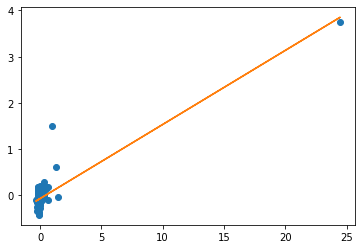

In [51]:
import numpy as np
#create basic scatterplot
plt.plot(combined_df['AAGR_birth'], combined_df['AAGR_married'], 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(combined_df['AAGR_birth'], combined_df['AAGR_married'], 1)

#add linear regression line to scatterplot 
plt.plot(combined_df['AAGR_birth'], m*combined_df['AAGR_birth']+b)

> 다른 행정동 값의 비해 너무 값이 크고 동떨어진 행정동 3개로 인해 군집화가 제대로 이루어지지 않아 제거

In [52]:
combined_df[combined_df['지역']=='송파구_가락1동']

,지역,AAGR_birth,AAGR_married,영유아/정원,평균소득
211,송파구_가락1동,24.48,3.74,2.83,7281.91


In [53]:
combined_df = combined_df[combined_df.지역 != '송파구_가락1동'] 
#combined_df = combined_df[combined_df.지역 != '양천구_신월6동'] 
#combined_df = combined_df[combined_df.지역 != '강동구_고덕2동'] 

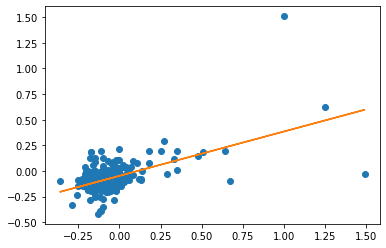

In [54]:
import numpy as np
#create basic scatterplot
plt.plot(combined_df['AAGR_birth'], combined_df['AAGR_married'], 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(combined_df['AAGR_birth'], combined_df['AAGR_married'], 1)

#add linear regression line to scatterplot 
plt.plot(combined_df['AAGR_birth'], m*combined_df['AAGR_birth']+b)

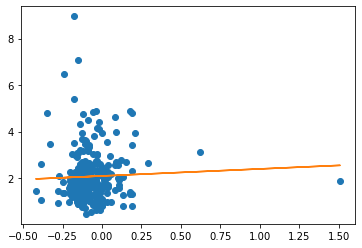

In [55]:
import numpy as np
#create basic scatterplot
plt.plot(combined_df['AAGR_married'], combined_df['영유아/정원'], 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(combined_df['AAGR_married'], combined_df['영유아/정원'], 1)

#add linear regression line to scatterplot 
plt.plot(combined_df['AAGR_married'], m*combined_df['AAGR_married']+b)

(array([  5.,  35., 193.,  56.,  19.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([-0.42      , -0.29133333, -0.16266667, -0.034     ,  0.09466667,
         0.22333333,  0.352     ,  0.48066667,  0.60933333,  0.738     ,
         0.86666667,  0.99533333,  1.124     ,  1.25266667,  1.38133333,
         1.51      ]),
 <BarContainer object of 15 artists>)

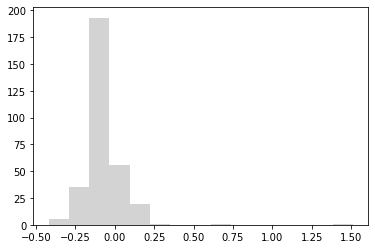

In [56]:
plt.hist(combined_df['AAGR_married'],bins=15, color='lightgrey')

(array([27., 84., 94., 55., 19., 12.,  8.,  8.,  1.,  0.,  1.,  1.,  0.,
         0.,  1.]),
 array([0.46      , 1.02666667, 1.59333333, 2.16      , 2.72666667,
        3.29333333, 3.86      , 4.42666667, 4.99333333, 5.56      ,
        6.12666667, 6.69333333, 7.26      , 7.82666667, 8.39333333,
        8.96      ]),
 <BarContainer object of 15 artists>)

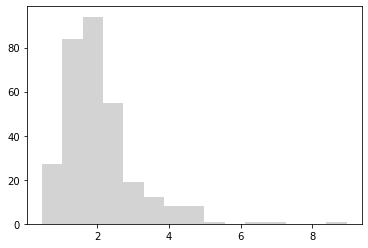

In [57]:
plt.hist(combined_df['영유아/정원'],bins=15,color='lightgrey')

(array([  5., 112., 156.,  22.,   4.,   5.,   1.,   1.,   2.,   0.,   0.,
          1.,   0.,   1.,   1.]),
 array([-0.36      , -0.23666667, -0.11333333,  0.01      ,  0.13333333,
         0.25666667,  0.38      ,  0.50333333,  0.62666667,  0.75      ,
         0.87333333,  0.99666667,  1.12      ,  1.24333333,  1.36666667,
         1.49      ]),
 <BarContainer object of 15 artists>)

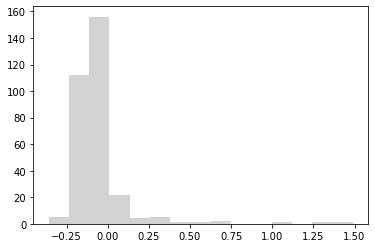

In [58]:
plt.hist(combined_df['AAGR_birth'],bins=15,color='lightgrey')

(array([136.,  80.,  52.,  14.,  12.,   3.,   2.,   3.,   7.,   2.]),
 array([ 3321.14 ,  4185.002,  5048.864,  5912.726,  6776.588,  7640.45 ,
         8504.312,  9368.174, 10232.036, 11095.898, 11959.76 ]),
 <BarContainer object of 10 artists>)

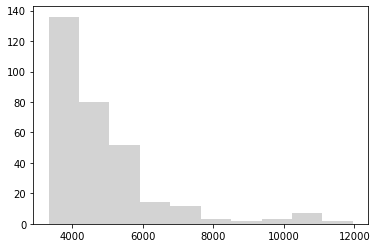

In [59]:
plt.hist(combined_df['평균소득'],bins=10, color='lightgrey')

# 5. 데이터 표준화
> 위에 보이는 시각화에서 보여주듯 편차가 상대적으로 큰 행정동들이 있기 때문에 RobustScaler를 사용하여 이상값의 영향을 최소화한 후 군집화 진행 

In [60]:
 combined_df = combined_df.reset_index(drop=True)

In [61]:
combined_df = combined_df.set_index('지역')

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
scaled = sc.fit_transform(combined_df)
pd.DataFrame(scaled,columns=combined_df.columns).describe() 

,AAGR_birth,AAGR_married,영유아/정원,평균소득
count,311.000000,311.000000,311.000000,311.000000
mean,0.162353,0.179165,0.189442,0.178298
std,0.096020,0.072292,0.122813,0.177490
min,0.000000,0.000000,0.000000,0.000000
25%,0.118919,0.145078,0.112353,0.057154
50%,0.145946,0.170984,0.161176,0.133316
75%,0.178378,0.199482,0.227647,0.223474
max,1.000000,1.000000,1.000000,1.000000


In [63]:
check_df = pd.DataFrame(scaled,columns=combined_df.columns)

----

# 6. 변수간 상관관계 확인

/Users/jincheong-a/anaconda3/envs/cadk7/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.draw()
/Users/jincheong-a/anaconda3/envs/cadk7/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.draw()
/Users/jincheong-a/anaconda3/envs/cadk7/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.draw()
/Users/jincheong-a/anaconda3/envs/cadk7/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.draw()
/Users/jincheong-a/anaconda3/envs/cadk7/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.draw()
/Users/jincheong-a/anaconda3/envs/cadk7/lib/python3.7/site-pack

<AxesSubplot:>

/Users/jincheong-a/anaconda3/envs/cadk7/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jincheong-a/anaconda3/envs/cadk7/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jincheong-a/anaconda3/envs/cadk7/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jincheong-a/anaconda3/envs/cadk7/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jincheong-a/anaconda3/envs/cadk7/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 

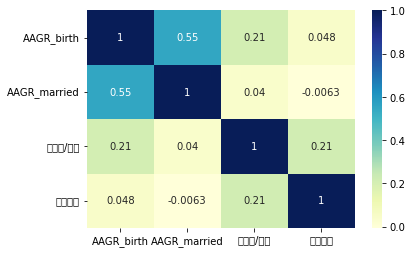

In [64]:
import seaborn as sns
sns.heatmap(pd.DataFrame(scaled,columns=combined_df.columns).corr(),annot=True,cmap='YlGnBu')

----

## 7. PCA 차원 축소

In [65]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pca.fit(scaled)
result_pca = pca.transform(scaled)
print(result_pca.shape)

(311, 2)


In [66]:
pca_columns = ['pca_component1','pca_component2']
df_pca = pd.DataFrame(result_pca,columns=pca_columns)
df_pca.head()

,pca_component1,pca_component2
0,0.532199,0.258853
1,0.629202,0.301755
2,0.398474,-0.106877
3,0.672904,-0.206758
4,0.755986,-0.325806


(array([96., 94., 71., 18., 11.,  3.,  4.,  5.,  6.,  3.]),
 array([-0.20351274, -0.10385041, -0.00418808,  0.09547425,  0.19513658,
         0.29479891,  0.39446124,  0.49412358,  0.59378591,  0.69344824,
         0.79311057]),
 <BarContainer object of 10 artists>)

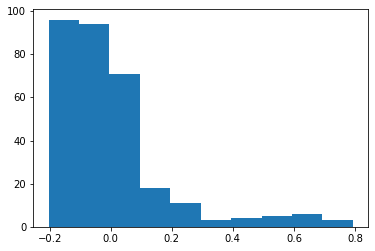

In [67]:
plt.hist(df_pca['pca_component1'])

(array([  3.,  17., 120., 108.,  40.,  11.,   6.,   4.,   1.,   1.]),
 array([-0.32580601, -0.22721498, -0.12862396, -0.03003294,  0.06855809,
         0.16714911,  0.26574013,  0.36433116,  0.46292218,  0.5615132 ,
         0.66010423]),
 <BarContainer object of 10 artists>)

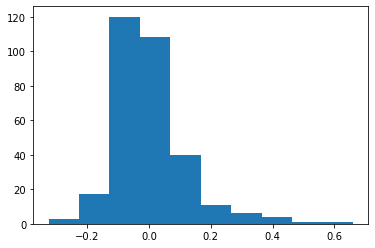

In [68]:
plt.hist(df_pca['pca_component2'])

In [69]:
pca.explained_variance_ratio_

array([0.5373011 , 0.24703885])

In [70]:
sum(pca.explained_variance_ratio_)

0.7843399503929698

-----

In [71]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#from yellowbrick.cluster import SilhouetteVisualizer

# 8. Elbow method 활용하여 최적 군집 개수 확인

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


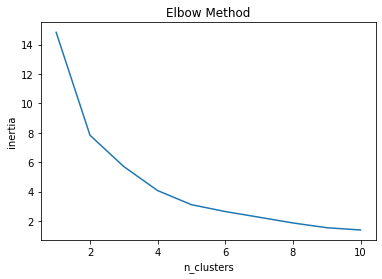

In [72]:
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df_pca)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

# 9. 군집별 실루엣 계수 확인

In [73]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

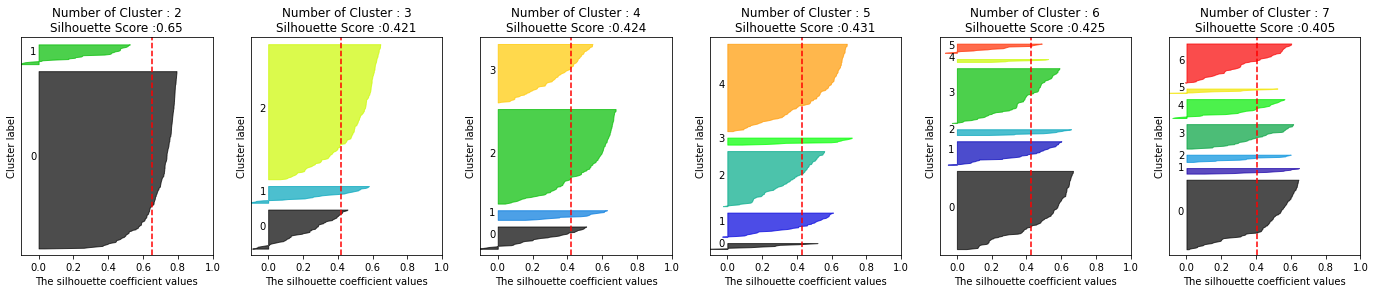

In [74]:
import numpy as np


visualize_silhouette([ 2, 3, 4, 5,6,7], df_pca)

# 10. 군집 개수 결정, K-Means 모델 생성 및 군집화 + 행정동별 군집 라벨 매칭 

In [75]:
#케이민즈
kmeans = KMeans(n_clusters =5, init='k-means++', max_iter=400, random_state=0).fit(df_pca)
combined_df['cluster'] = kmeans.labels_
print(kmeans.labels_)


[0 0 3 3 3 3 3 2 2 0 2 2 0 2 0 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 1 2
 2 2 2 2 2 4 2 2 4 4 4 4 4 4 4 4 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 4 2 2 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 2 1 4 4 4
 1 1 4 4 4 4 4 1 1 4 1 4 4 4 4 4 4 4 1 4 4 4 4 4 1 4 4 4 4 1 4 4 4 1 4 2 0
 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 4 1 0 1 2 4 1 1 4 4 4 3 3 3 4 4 4 4
 4 2 1 4 4 1 2 2 1 1 4 1 4 4 4 1 2 4 4 1 4 1 4 4 4 4 2 2 2 2 4 3 3 3 0 2 2
 3 2 3 2 2 2 2 2 2 4 4 4 4 4 1 4 2 2 1 4 1 2 2 4 4 4 4 1 1 1 4 1 4 2 4 4 1
 1 0 2 0 4 2 2 4 4 4 4 4 4 4 1 4 4 4 4 1 4 4 4 2 1 2 4 4 4 4 0 4 4 4 4 4 1
 4 4 4 4 4 1 4 4 4 1 4 4 4 4 4]


# 11. 군집 시각화 및 평가 
>  군집 시각화로 군집이 잘 이루워 졌는지 확인

In [76]:
df_pca ['cluster'] = kmeans.labels_

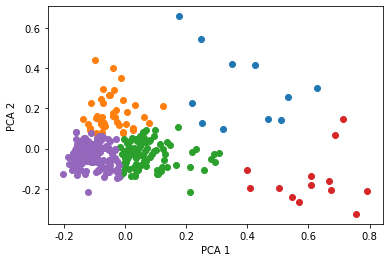

In [77]:
marker0_ind = df_pca[df_pca['cluster']==0].index
marker1_ind = df_pca[df_pca['cluster']==1].index
marker2_ind = df_pca[df_pca['cluster']==2].index
marker3_ind = df_pca[df_pca['cluster']==3].index
marker4_ind = df_pca[df_pca['cluster']==4].index

plt.scatter(x=df_pca.loc[marker0_ind,'pca_component1'],y=df_pca.loc[marker0_ind,'pca_component2'],marker='o')
plt.scatter(x=df_pca.loc[marker1_ind,'pca_component1'],y=df_pca.loc[marker1_ind,'pca_component2'],marker='o')
plt.scatter(x=df_pca.loc[marker2_ind,'pca_component1'],y=df_pca.loc[marker2_ind,'pca_component2'],marker='o')
plt.scatter(x=df_pca.loc[marker3_ind,'pca_component1'],y=df_pca.loc[marker3_ind,'pca_component2'],marker='o')
plt.scatter(x=df_pca.loc[marker4_ind,'pca_component1'],y=df_pca.loc[marker4_ind,'pca_component2'],marker='o')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

--------

# 12. 군집별 비교, 분석 및 시각화 

In [91]:
score_samples = silhouette_samples(combined_df.iloc[:,:-1],combined_df['cluster'])

In [93]:
combined_df['sil_coeff'] = score_samples

In [94]:
combined_df.groupby('cluster').sil_coeff.mean()

cluster
0   -0.097021
1   -0.169909
2    0.419545
3    0.546097
4    0.099608
Name: sil_coeff, dtype: float64

In [78]:
cluster0 = combined_df[combined_df['cluster']==0]
cluster1 = combined_df[combined_df['cluster']==1]
cluster2 = combined_df[combined_df['cluster']==2]
cluster3 = combined_df[combined_df['cluster']==3]
cluster4 = combined_df[combined_df['cluster']==4]

In [79]:
cluster0.describe()

,AAGR_birth,AAGR_married,영유아/정원,평균소득,cluster
count,11.000000,11.000000,11.000000,11.000000,11.0
mean,0.249091,-0.002727,5.079091,7302.105000,0.0
std,0.599774,0.241043,1.804220,1424.881988,0.0
min,-0.260000,-0.240000,2.780000,4564.930000,0.0
25%,-0.115000,-0.140000,4.055000,6425.245000,0.0
50%,-0.090000,-0.060000,4.830000,7281.590000,0.0
75%,0.420000,0.045000,5.685000,8405.765000,0.0
max,1.490000,0.620000,8.960000,9551.995000,0.0


In [80]:
cluster0.median()

AAGR_birth        -0.09
AAGR_married      -0.06
영유아/정원             4.83
평균소득            7281.59
cluster            0.00
dtype: float64

In [81]:
cluster1.describe()

,AAGR_birth,AAGR_married,영유아/정원,평균소득,cluster
count,42.000000,42.000000,42.000000,42.000000,42.0
mean,0.075000,0.022381,3.200000,4102.114286,1.0
std,0.245061,0.263687,0.788184,498.836913,0.0
min,-0.160000,-0.180000,1.310000,3321.140000,1.0
25%,-0.070000,-0.100000,2.610000,3698.361250,1.0
50%,-0.005000,-0.050000,3.185000,3948.465000,1.0
75%,0.132500,0.080000,3.685000,4550.177500,1.0
max,1.000000,1.510000,4.780000,5417.950000,1.0


In [82]:
cluster2.describe()

,AAGR_birth,AAGR_married,영유아/정원,평균소득,cluster
count,95.000000,95.000000,95.000000,95.000000,95.0
mean,-0.087368,-0.091579,2.011263,5507.958126,2.0
std,0.089028,0.089446,0.593286,648.016246,0.0
min,-0.290000,-0.420000,0.620000,4722.200000,2.0
25%,-0.150000,-0.140000,1.570000,5017.060000,2.0
50%,-0.090000,-0.100000,2.010000,5327.280000,2.0
75%,-0.035000,-0.055000,2.400000,5700.110000,2.0
max,0.350000,0.180000,3.600000,7419.950000,2.0


In [83]:
cluster3.describe()

,AAGR_birth,AAGR_married,영유아/정원,평균소득,cluster
count,13.000000,13.000000,13.000000,13.000000,13.0
mean,-0.078462,-0.095385,2.195385,10301.587179,3.0
std,0.062028,0.121217,1.350880,1035.959898,0.0
min,-0.170000,-0.350000,0.980000,8492.840000,3.0
25%,-0.130000,-0.160000,1.530000,9961.980000,3.0
50%,-0.080000,-0.120000,1.860000,10292.980000,3.0
75%,-0.040000,0.000000,2.100000,10875.760000,3.0
max,0.050000,0.110000,5.410000,11959.760000,3.0


In [84]:
cluster4.describe()

,AAGR_birth,AAGR_married,영유아/정원,평균소득,cluster
count,150.000000,150.000000,150.000000,150.000000,150.0
mean,-0.100800,-0.093667,1.559800,4014.026937,4.0
std,0.072801,0.087289,0.463485,401.550615,0.0
min,-0.360000,-0.390000,0.460000,3321.140000,4.0
25%,-0.150000,-0.150000,1.255000,3676.980000,4.0
50%,-0.100000,-0.095000,1.555000,3946.820000,4.0
75%,-0.060000,-0.050000,1.870000,4331.640000,4.0
max,0.130000,0.190000,2.600000,5054.020000,4.0


In [85]:
cluster4

,AAGR_birth,AAGR_married,영유아/정원,평균소득,cluster
지역,,,,,
강북구_미아동,-0.25,-0.15,1.40,3467.21,4
강북구_번1동,-0.22,-0.15,1.20,3640.10,4
강북구_번2동,-0.23,-0.08,1.18,3640.10,4
강북구_번3동,-0.07,-0.06,1.71,3640.10,4
강북구_삼각산동,-0.03,-0.16,1.93,3467.21,4
...,...,...,...,...,...
중랑구_상봉2동,0.00,0.11,1.69,3987.76,4
중랑구_신내1동,-0.04,-0.13,1.03,3837.79,4
중랑구_신내2동,-0.13,-0.09,1.22,3837.79,4


--------

In [86]:
df0 = pd.DataFrame(cluster0.mean(),columns=['cluster0'])
df1 = pd.DataFrame(cluster1.mean(),columns=['cluster1'])
df2 = pd.DataFrame(cluster2.mean(),columns=['cluster2'])
df3 = pd.DataFrame(cluster3.mean(),columns=['cluster3'])
df4 = pd.DataFrame(cluster4.mean(),columns=['cluster4'])

mean_df = pd.concat([df0,df1,df2,df3,df4],axis=1)
mean_df

,cluster0,cluster1,cluster2,cluster3,cluster4
AAGR_birth,0.249091,0.075000,-0.087368,-0.078462,-0.100800
AAGR_married,-0.002727,0.022381,-0.091579,-0.095385,-0.093667
영유아/정원,5.079091,3.200000,2.011263,2.195385,1.559800
평균소득,7302.105000,4102.114286,5507.958126,10301.587179,4014.026937
cluster,0.000000,1.000000,2.000000,3.000000,4.000000


In [87]:
mean_df = mean_df.transpose()

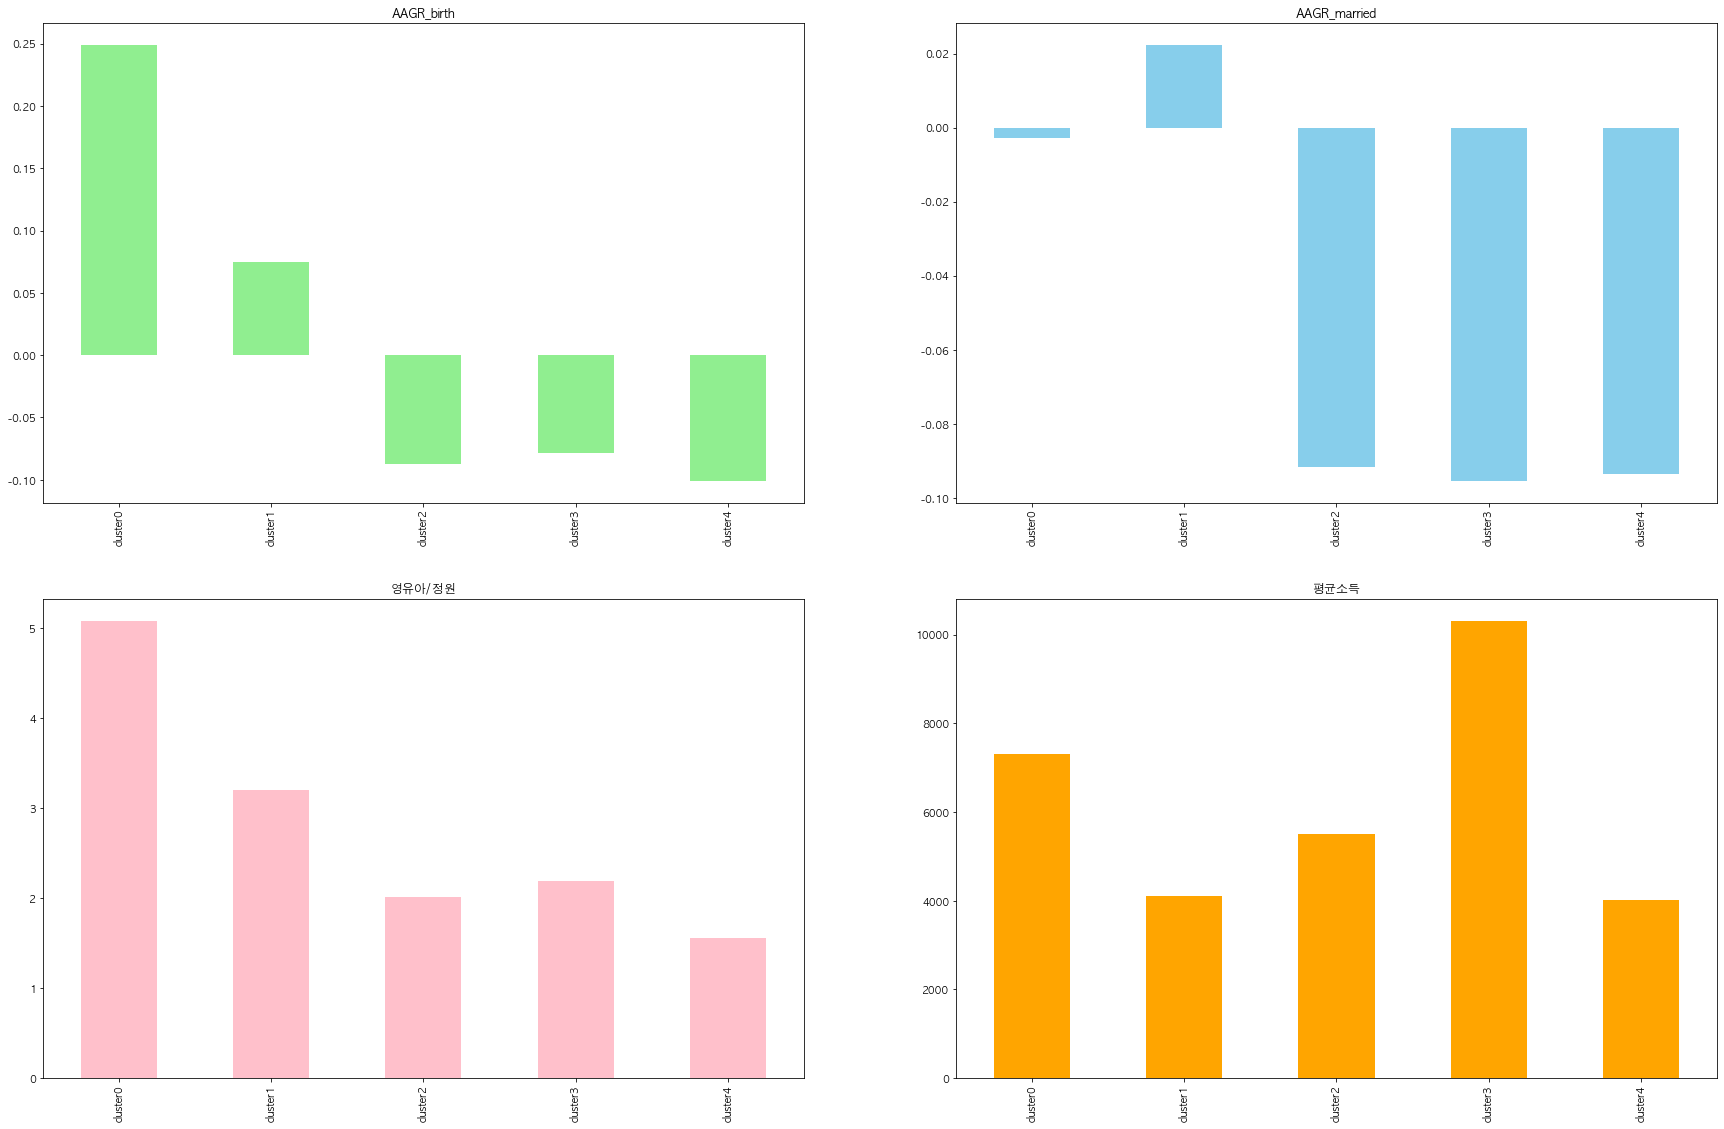

In [88]:
mean_col = ['AAGR_birth','AAGR_married','영유아/정원','평균소득']
colors = ['lightgreen','skyblue','pink','orange','red']

fig, ax = plt.subplots(figsize = (30,30))
plt.rc('font', family='AppleGothic')

for i, mean_col in enumerate(mean_col):
    plt.subplot(3, 2 , i+1) #subplot(nrows, ncols, index)
    plt.title(mean_col)
    mean_df[mean_col].plot.bar(color=colors[i])


# 13. 최종 군집 선정 및 데이터 저장 

In [88]:
combined_df.head()

,AAGR_birth,AAGR_married,영유아/정원,평균소득,cluster
지역,,,,,
강남구_개포1동,-0.26,-0.24,6.48,8492.840000,0
강남구_개포2동,0.51,0.18,4.88,9551.995000,0
강남구_개포4동,0.05,0.00,1.72,8492.840000,3
강남구_세곡동,-0.08,-0.09,1.86,10956.943333,3
강남구_일원1동,-0.16,0.06,0.98,11959.760000,3


In [89]:
#재확인
s = list(combined_df.groupby('cluster'))
s[1]

(1,
             AAGR_birth  AAGR_married  영유아/정원      평균소득  cluster
 지역                                                             
 강북구_인수동          -0.09         -0.11    3.48  3657.810        1
 구로구_신도림동         -0.05         -0.05    2.61  4030.190        1
 노원구_상계10동        -0.02         -0.14    2.61  3676.980        1
 노원구_상계8동         -0.07          0.10    2.57  3676.980        1
 노원구_상계9동         -0.09         -0.08    3.33  3676.980        1
 노원구_중계4동         -0.16         -0.02    4.12  3321.140        1
 노원구_중계본동         -0.12         -0.09    3.29  3321.140        1
 노원구_하계2동          0.01         -0.13    3.70  4133.370        1
 도봉구_쌍문4동          0.01         -0.05    3.83  3714.430        1
 동대문구_답십리1동        0.00         -0.09    2.61  3673.980        1
 동대문구_장안2동         0.03         -0.06    2.34  3908.200        1
 동대문구_휘경1동         0.03         -0.10    3.46  4105.240        1
 동작구_사당5동          0.00          0.21    3.95  5417.950        1
 동작구_상도2동         -0.

-----

In [90]:
complete_combined_df = combined_df.copy()

In [91]:
complete_combined_df.reset_index(inplace=True)

In [92]:
complete_combined_df['행정구'] = complete_combined_df.지역.apply(lambda x: x.split('_')[0])
complete_combined_df['행정동'] = complete_combined_df.지역.apply(lambda x: x.split('_')[1])
complete_combined_df = complete_combined_df.drop(columns=['지역'], axis=1)
complete_combined_df.head()

,AAGR_birth,AAGR_married,영유아/정원,평균소득,cluster,행정구,행정동
0,-0.26,-0.24,6.48,8492.840000,0,강남구,개포1동
1,0.51,0.18,4.88,9551.995000,0,강남구,개포2동
2,0.05,0.00,1.72,8492.840000,3,강남구,개포4동
3,-0.08,-0.09,1.86,10956.943333,3,강남구,세곡동
4,-0.16,0.06,0.98,11959.760000,3,강남구,일원1동


In [93]:
code_df = pd.read_csv('./행정기관코드_변환용데이터_제2.csv',index_col=0)
code_df.head()

,행정구,행정동,행정구역코드,행정기관코드
0,종로구,청운효자동,11010720,1111051500
1,종로구,사직동,11010530,1111053000
2,종로구,삼청동,11010540,1111054000
3,종로구,부암동,11010550,1111055000
4,종로구,평창동,11010560,1111056000


In [94]:
complete_df = complete_combined_df.merge(code_df,how='left',on=['행정구','행정동'])
complete_df

,AAGR_birth,AAGR_married,영유아/정원,평균소득,cluster,행정구,행정동,행정구역코드,행정기관코드
0,-0.26,-0.24,6.48,8492.840000,0,강남구,개포1동,11230680,1168066000
1,0.51,0.18,4.88,9551.995000,0,강남구,개포2동,11230800,1168067000
2,0.05,0.00,1.72,8492.840000,3,강남구,개포4동,11230710,1168069000
3,-0.08,-0.09,1.86,10956.943333,3,강남구,세곡동,11230760,1168070000
4,-0.16,0.06,0.98,11959.760000,3,강남구,일원1동,11230730,1168073000
...,...,...,...,...,...,...,...,...,...
306,0.00,0.11,1.69,3987.760000,4,중랑구,상봉2동,11070600,1126059000
307,-0.04,-0.13,1.03,3837.790000,4,중랑구,신내1동,11070690,1126068000
308,-0.13,-0.09,1.22,3837.790000,4,중랑구,신내2동,11070700,1126069000
309,-0.15,-0.20,1.66,3967.030000,4,중랑구,중화1동,11070610,1126060000


In [117]:
complete_df[complete_df['행정구']=='구로구'] 

,AAGR_birth,AAGR_married,영유아/정원,평균소득,cluster,행정구,행정동,행정구역코드,행정기관코드
84,0.05,-0.03,1.61,4331.640,4,구로구,개봉1동,11170720,1153074000
85,-0.14,-0.17,2.28,4331.640,4,구로구,개봉2동,11170640,1153075000
86,-0.16,-0.19,1.18,4331.640,4,구로구,개봉3동,11170650,1153076000
87,-0.20,-0.16,1.65,4061.910,4,구로구,고척1동,11170610,1153072000
88,-0.08,-0.21,1.59,4061.910,4,구로구,고척2동,11170620,1153073000
89,-0.07,0.01,1.96,3716.190,4,구로구,구로1동,11170520,1153052000
90,-0.12,-0.12,0.94,3716.190,4,구로구,구로4동,11170550,1153055000
91,-0.08,-0.06,1.74,3716.190,4,구로구,구로5동,11170560,1153056000
92,-0.08,-0.12,1.53,4177.055,4,구로구,수궁동,11170690,1153079000
93,-0.05,-0.05,2.61,4030.190,1,구로구,신도림동,11170510,1153051000


In [95]:
complete_df.to_csv('./data_final11.csv')

In [102]:
combined_df.groupby('cluster').mean()

,AAGR_birth,AAGR_married,영유아/정원,평균소득
cluster,,,,
0,0.249091,-0.002727,5.079091,7302.105000
1,0.075000,0.022381,3.200000,4102.114286
2,-0.087368,-0.091579,2.011263,5507.958126
3,-0.078462,-0.095385,2.195385,10301.587179
4,-0.100800,-0.093667,1.559800,4014.026937
